In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt

# №1.3


In [2]:
housing_df = pd.read_csv('housing.csv')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


# Проведите преобразование категориального признака ocean_proximity через OneHot или Dummy-кодировку

In [3]:
housing_df = pd.get_dummies(housing_df, columns = ['ocean_proximity'], prefix_sep = '__')
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0


# Замените признаки total_rooms и total_bedrooms на average_rooms и average_bedrooms (поделив на households).

In [4]:
housing_df['average_rooms'] = housing_df['total_rooms']/housing_df['households']
housing_df = housing_df.drop('total_rooms', axis=1)

housing_df['average_bedrooms'] = housing_df['total_bedrooms']/housing_df['households']
housing_df = housing_df.drop('total_bedrooms', axis=1)

housing_df

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity__<1H OCEAN,ocean_proximity__INLAND,ocean_proximity__ISLAND,ocean_proximity__NEAR BAY,ocean_proximity__NEAR OCEAN,average_rooms,average_bedrooms
0,-122.23,37.88,41.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0,6.984127,1.023810
1,-122.22,37.86,21.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0,6.238137,0.971880
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0,6.281853,1.081081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,0,1,0,0,0,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,0,1,0,0,0,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,0,1,0,0,0,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,0,1,0,0,0,5.329513,1.171920


# В признаке average_bedrooms (total_bedrooms) есть отсутствующие значения. Определите число экземпляров данных, для которых этот признак отсутствует. 

In [5]:
(housing_df['average_bedrooms'].isnull()).to_numpy().sum()

207

# Разбейте датасет на тренировочную, валидационную и тестовую выборку

In [6]:
from sklearn.model_selection import train_test_split

housing_df_train_val, housing_df_test =  train_test_split( housing_df, test_size =0.1)
housing_df_train, housing_df_val =  train_test_split( housing_df_train_val, test_size =0.1)

# Придумайте и обоснуйте стратегию заполнения пропусков в этой задаче. Заполните пропуски.

In [7]:
from sklearn.linear_model import LinearRegression

xy = housing_df_train.dropna(axis = 0)
X_train = xy[['households', 'median_income', 'average_rooms' ]]
y_train = xy['average_bedrooms']

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [8]:
def apply_to_all_samples(func, samples):
    for sample in samples:
        sample = func(sample)

def repare_with_reg (sample):
    sample_null = sample['average_bedrooms'].isnull()
    X = sample.loc[sample_null,['households', 'median_income', 'average_rooms' ]]
    sample.loc[sample_null, 'average_bedrooms'] = lin_reg.predict(X)
    return 


apply_to_all_samples( repare_with_reg, [housing_df_train, housing_df_val, housing_df_test] )

In [9]:
(housing_df_train['average_bedrooms'].isnull()).to_numpy().sum() +\
(housing_df_test['average_bedrooms'].isnull()).to_numpy().sum() +\
(housing_df_val['average_bedrooms'].isnull()).to_numpy().sum()

0

# Нормализуйте признаки longitude и latitude (сделайте так, чтобы каждый признак имел среднее значение 0 и дисперсию 1 внутри обучающей выборки)

In [10]:
from sklearn import preprocessing
scaler_lon = preprocessing.StandardScaler().fit(housing_df_train[['longitude']])
scaler_lat = preprocessing.StandardScaler().fit(housing_df_train[['latitude']])

In [11]:
def norm (sample):
    sample['longitude'] = scaler_lon.transform(sample[['longitude']]).reshape(-1)
    sample['latitude'] = scaler_lat.transform(sample[['latitude']]).reshape(-1)
    

In [12]:
apply_to_all_samples( norm, [housing_df_train, housing_df_val, housing_df_test] )

In [13]:
np.std(housing_df_train[['longitude', 'latitude']])

longitude    1.0
latitude     1.0
dtype: float64

In [14]:
np.std(housing_df_test[['longitude', 'latitude']])

longitude    0.997004
latitude     0.984167
dtype: float64

In [15]:
np.std(housing_df_val[['longitude', 'latitude']])

longitude    1.024448
latitude     1.016961
dtype: float64

# №2.1

In [16]:
davis_df = pd.read_csv('Davis.csv')
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


# Удалите некорректные данные

<AxesSubplot:>

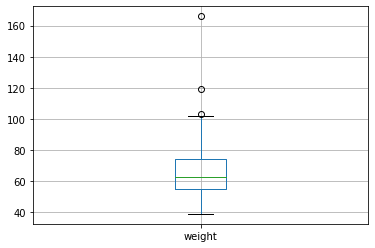

In [17]:
davis_df.boxplot(column=['weight'])

<AxesSubplot:>

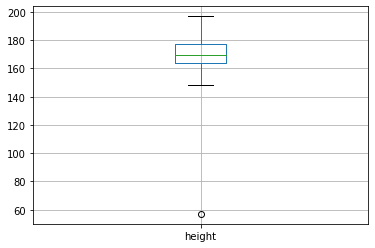

In [18]:
davis_df.boxplot(column=['height'])

In [19]:
davis_df = davis_df.loc[davis_df['weight'] > 43]
davis_df = davis_df.loc[davis_df['weight'] < 93]
davis_df = davis_df.loc[davis_df['height'] > 140]
davis_df = davis_df.loc[davis_df['height'] < 192]

davis_df = davis_df.drop(['repwt', 'repht', 'Unnamed: 0'], axis = 1) #Данные не нужные для работы тоже удаляю
davis_df = davis_df.dropna()
davis_df['sex'] = davis_df['sex'].apply(lambda sex: 1 if sex == "M" else -1)

davis_df

,sex,weight,height
0,1,77,182
1,-1,58,161
2,-1,53,161
3,1,68,177
4,-1,59,157
...,...,...,...
195,1,74,175
196,1,83,180
197,1,81,175
198,1,90,181


<AxesSubplot:>

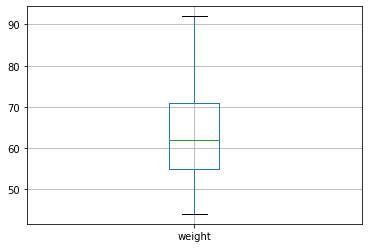

In [20]:
davis_df.boxplot(column=['weight'])

<AxesSubplot:>

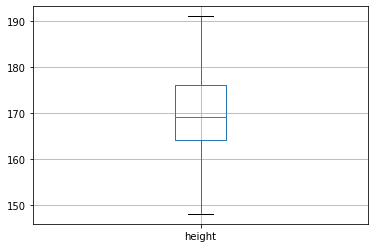

In [21]:
davis_df.boxplot(column=['height'])

# Выделите тестовую выборку из 50 экземпляров

In [22]:
davis_df_train, davis_df_test = train_test_split(davis_df, test_size = 50)

# На тренировочных данных постройте:
    Гистограмму height
    Гистограмму weight
    Эти же гистограммы для разных полов


<AxesSubplot:xlabel='weight', ylabel='Count'>

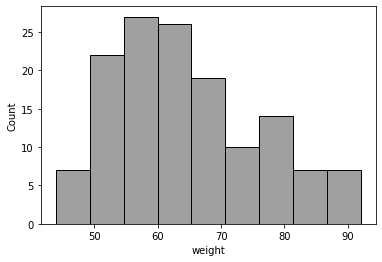

In [23]:
import seaborn as sns
sns.histplot(davis_df_train['weight'], color = 'grey')

<AxesSubplot:xlabel='height', ylabel='Count'>

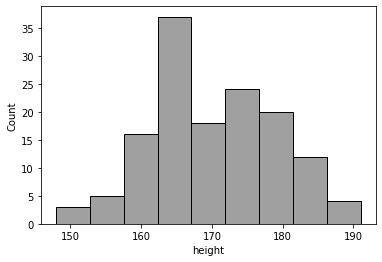

In [24]:
sns.histplot(davis_df_train['height'], color = 'grey')

<AxesSubplot:xlabel='weight', ylabel='Count'>

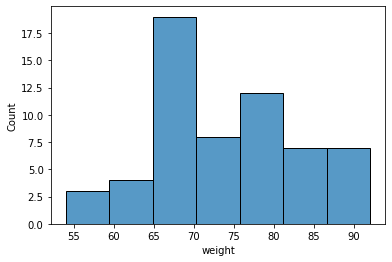

In [25]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 1,'weight'])

<AxesSubplot:xlabel='height', ylabel='Count'>

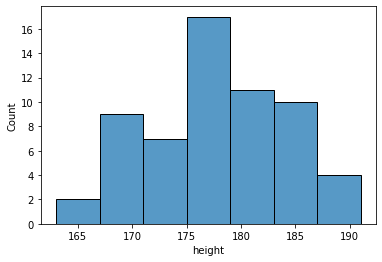

In [26]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == 1,'height'])

<AxesSubplot:xlabel='weight', ylabel='Count'>

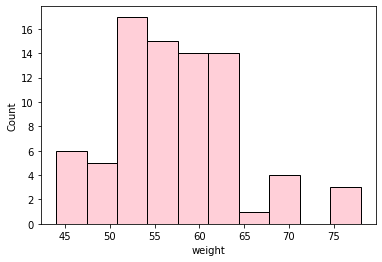

In [27]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == -1,'weight'], color = 'pink')

<AxesSubplot:xlabel='height', ylabel='Count'>

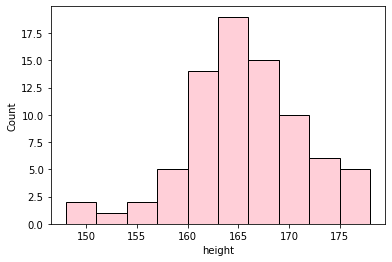

In [28]:
sns.histplot(davis_df_train.loc[davis_df_train['sex'] == -1,'height'], color = 'pink')

# На тренировочных данных обучите классификатор пола (sex),используя только признаки height и weight. Замерьте производительность на тренировочной и тестовой выборке (через Accuracy).

In [29]:
X_train, y_train = davis_df_train[['height','weight']], davis_df_train['sex']
X_test, y_test = davis_df_test[['height','weight']], davis_df_test['sex']

In [30]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [31]:
from sklearn.metrics import accuracy_score

train_predict = log_reg.predict(X_train)
accuracy_score(train_predict, y_train)

0.9136690647482014

In [32]:
test_predict = log_reg.predict(X_test)
accuracy_score(test_predict, y_test)

0.9

# Отобразите точки из обучающей выборки на плоскости (height-weight). Покрасьте их цветами в зависимости от пола. Раскрасьте области в зависимости от пола, предсказанного обученным в п.4. классификатором. Сделайте аналогичный график на тестовой выборке

In [33]:
x1_min, x1_max = X_train['weight'].min()-1, X_train['weight'].max()+1
x2_min, x2_max = X_train['height'].min()-1, X_train['height'].max()+1

In [34]:
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]

In [35]:
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])

In [36]:
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


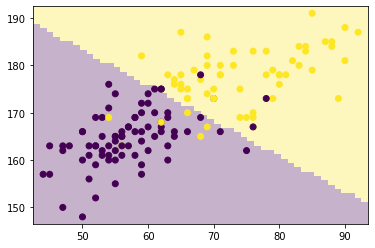

In [37]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(X_train['weight'], X_train['height'], c = y_train)
plt.show()


In [38]:
x1_min, x1_max = X_test['weight'].min()-1, X_test['weight'].max()+1
x2_min, x2_max = X_test['height'].min()-1, X_test['height'].max()+1
xx1,xx2 = np.mgrid[x1_min:x1_max:50j, x2_min:x2_max:50j]
X_pred = np.column_stack([xx2.reshape(-1),xx1.reshape(-1) ])
y_pred = log_reg.predict(X_pred)

C:\ProgramData\Anaconda3\envs\ML\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


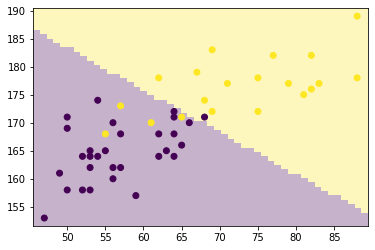

In [39]:
plt.pcolormesh(xx1,xx2, y_pred.reshape(xx1.shape), alpha=0.3, shading='auto')
plt.scatter(X_test['weight'], X_test['height'], c = y_test)
plt.show()

# №2.2

In [40]:
ccpp_df = pd.read_excel('CCPP.xlsx')
ccpp_df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# Возьмите данные с листа 1 и выделите валидационную и тестовую выборку.

In [41]:
ccpp_df_train_val, ccpp_df_test = train_test_split(ccpp_df, test_size=0.1)
ccpp_df_train, ccpp_df_val = train_test_split(ccpp_df_train_val, test_size=0.1)

# Постройте регрессионную модель. Замерьте коэффициент  и среднюю ошибку предсказания на валидационной выборке.

In [42]:
reg = LinearRegression()

In [43]:
X_train = ccpp_df_train.drop("PE",axis=1)
y_train = ccpp_df_train['PE']

In [44]:
reg.fit(X_train, y_train)

LinearRegression()

In [45]:
from sklearn.metrics import r2_score

val_predict = reg.predict(ccpp_df_val.drop("PE",axis=1))
val_y = ccpp_df_val['PE']
r2_score(val_y, val_predict)

0.9196481969681999

In [46]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(val_y, val_predict)

3.690722688933865

# Постройте точки из валидационной выборки на плоскости (t=истинное значение, y=предсказание модели).Отобразите вместе с ними прямую y=t. 

(420.0, 500.0)

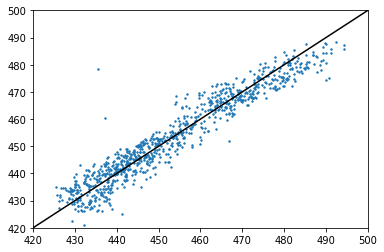

In [47]:

ax = plt.gca()

plt.scatter(val_y, val_predict, s = 2)
plt.plot([420, 500],[420,500], c = 'black')

ax.set_xlim((420, 500))
ax.set_ylim((420, 500))